**Multiple Linear Regression Analysis by Aana Kakroo (20BAI1138)**

# Data Cleaning

Import the required Python libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the datasets

In [5]:
#load CarPrice_Assignemnt.csv as df
df = pd.read_csv("https://raw.githubusercontent.com/aana0308/Car-Price-Prediction/main/data/CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Checking the dimensions of the dataframe

In [6]:
df.shape

(205, 26)

Information about the dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Description of data in the dataframe

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


We need to do some basic cleansing activity in order to feed our model the correct data.

Dropping car_ID column based on business knowledge (it does not affect the price of the car).

In [9]:
df = df.drop('car_ID',axis=1)

Checking the number of NULL or missing values in the dataframe

In [10]:
df.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

As we can see from above, there are no NULL or missing values in this dataset.

Checking for unique values in car names.

In [12]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

Typo Error in Car Company name:
1. maxda = mazda
2. Nissan = nissan
3. porsche = porcshce
4. toyota = toyouta
5. vokswagen = volkswagen = vw
6. audi 100 ls = audi 100ls
7. volkswagen rabbit = vw rabbit

In [13]:
#Renaming the typo errors in Car Company names
df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 
                                       'vw': 'volkswagen', 'audi 100 ls': 'audi 100ls', 'vw rabbit': 'volkswagen rabbit'})

In [14]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100ls', 'audi fox', 'audi 5000',
       'audi 4000', 'audi 5000s (diesel)', 'bmw 320i', 'bmw x1', 'bmw x3',
       'bmw z4', 'bmw x4', 'bmw x5', 'chevrolet impala',
       'chevrolet monte carlo', 'chevrolet vega 2300', 'dodge rampage',
       'dodge challenger se', 'dodge d200', 'dodge monaco (sw)',
       'dodge colt hardtop', 'dodge colt (sw)', 'dodge coronet custom',
       'dodge dart custom', 'dodge coronet custom (sw)', 'honda civic',
       'honda civic cvcc', 'honda accord cvcc', 'honda accord lx',
       'honda civic 1500 gl', 'honda accord', 'honda civic 1300',
       'honda prelude', 'honda civic (auto)', 'isuzu MU-X',
       'isuzu D-Max ', 'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf',
       'jaguar xk', 'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe',
       'mazda rx-4', 'mazda glc deluxe', 'mazda 626', 'mazda glc',
       'mazda rx-7 gs', 'mazda glc 4', 'mazda glc custom 

Changing the datatype of symboling as it is categorical variable

In [15]:
df['symboling'] = df['symboling'].astype(str)
df['symboling']

0       3
1       3
2       1
3       2
4       2
       ..
200    -1
201    -1
202    -1
203    -1
204    -1
Name: symboling, Length: 205, dtype: object

# Data Visualisation

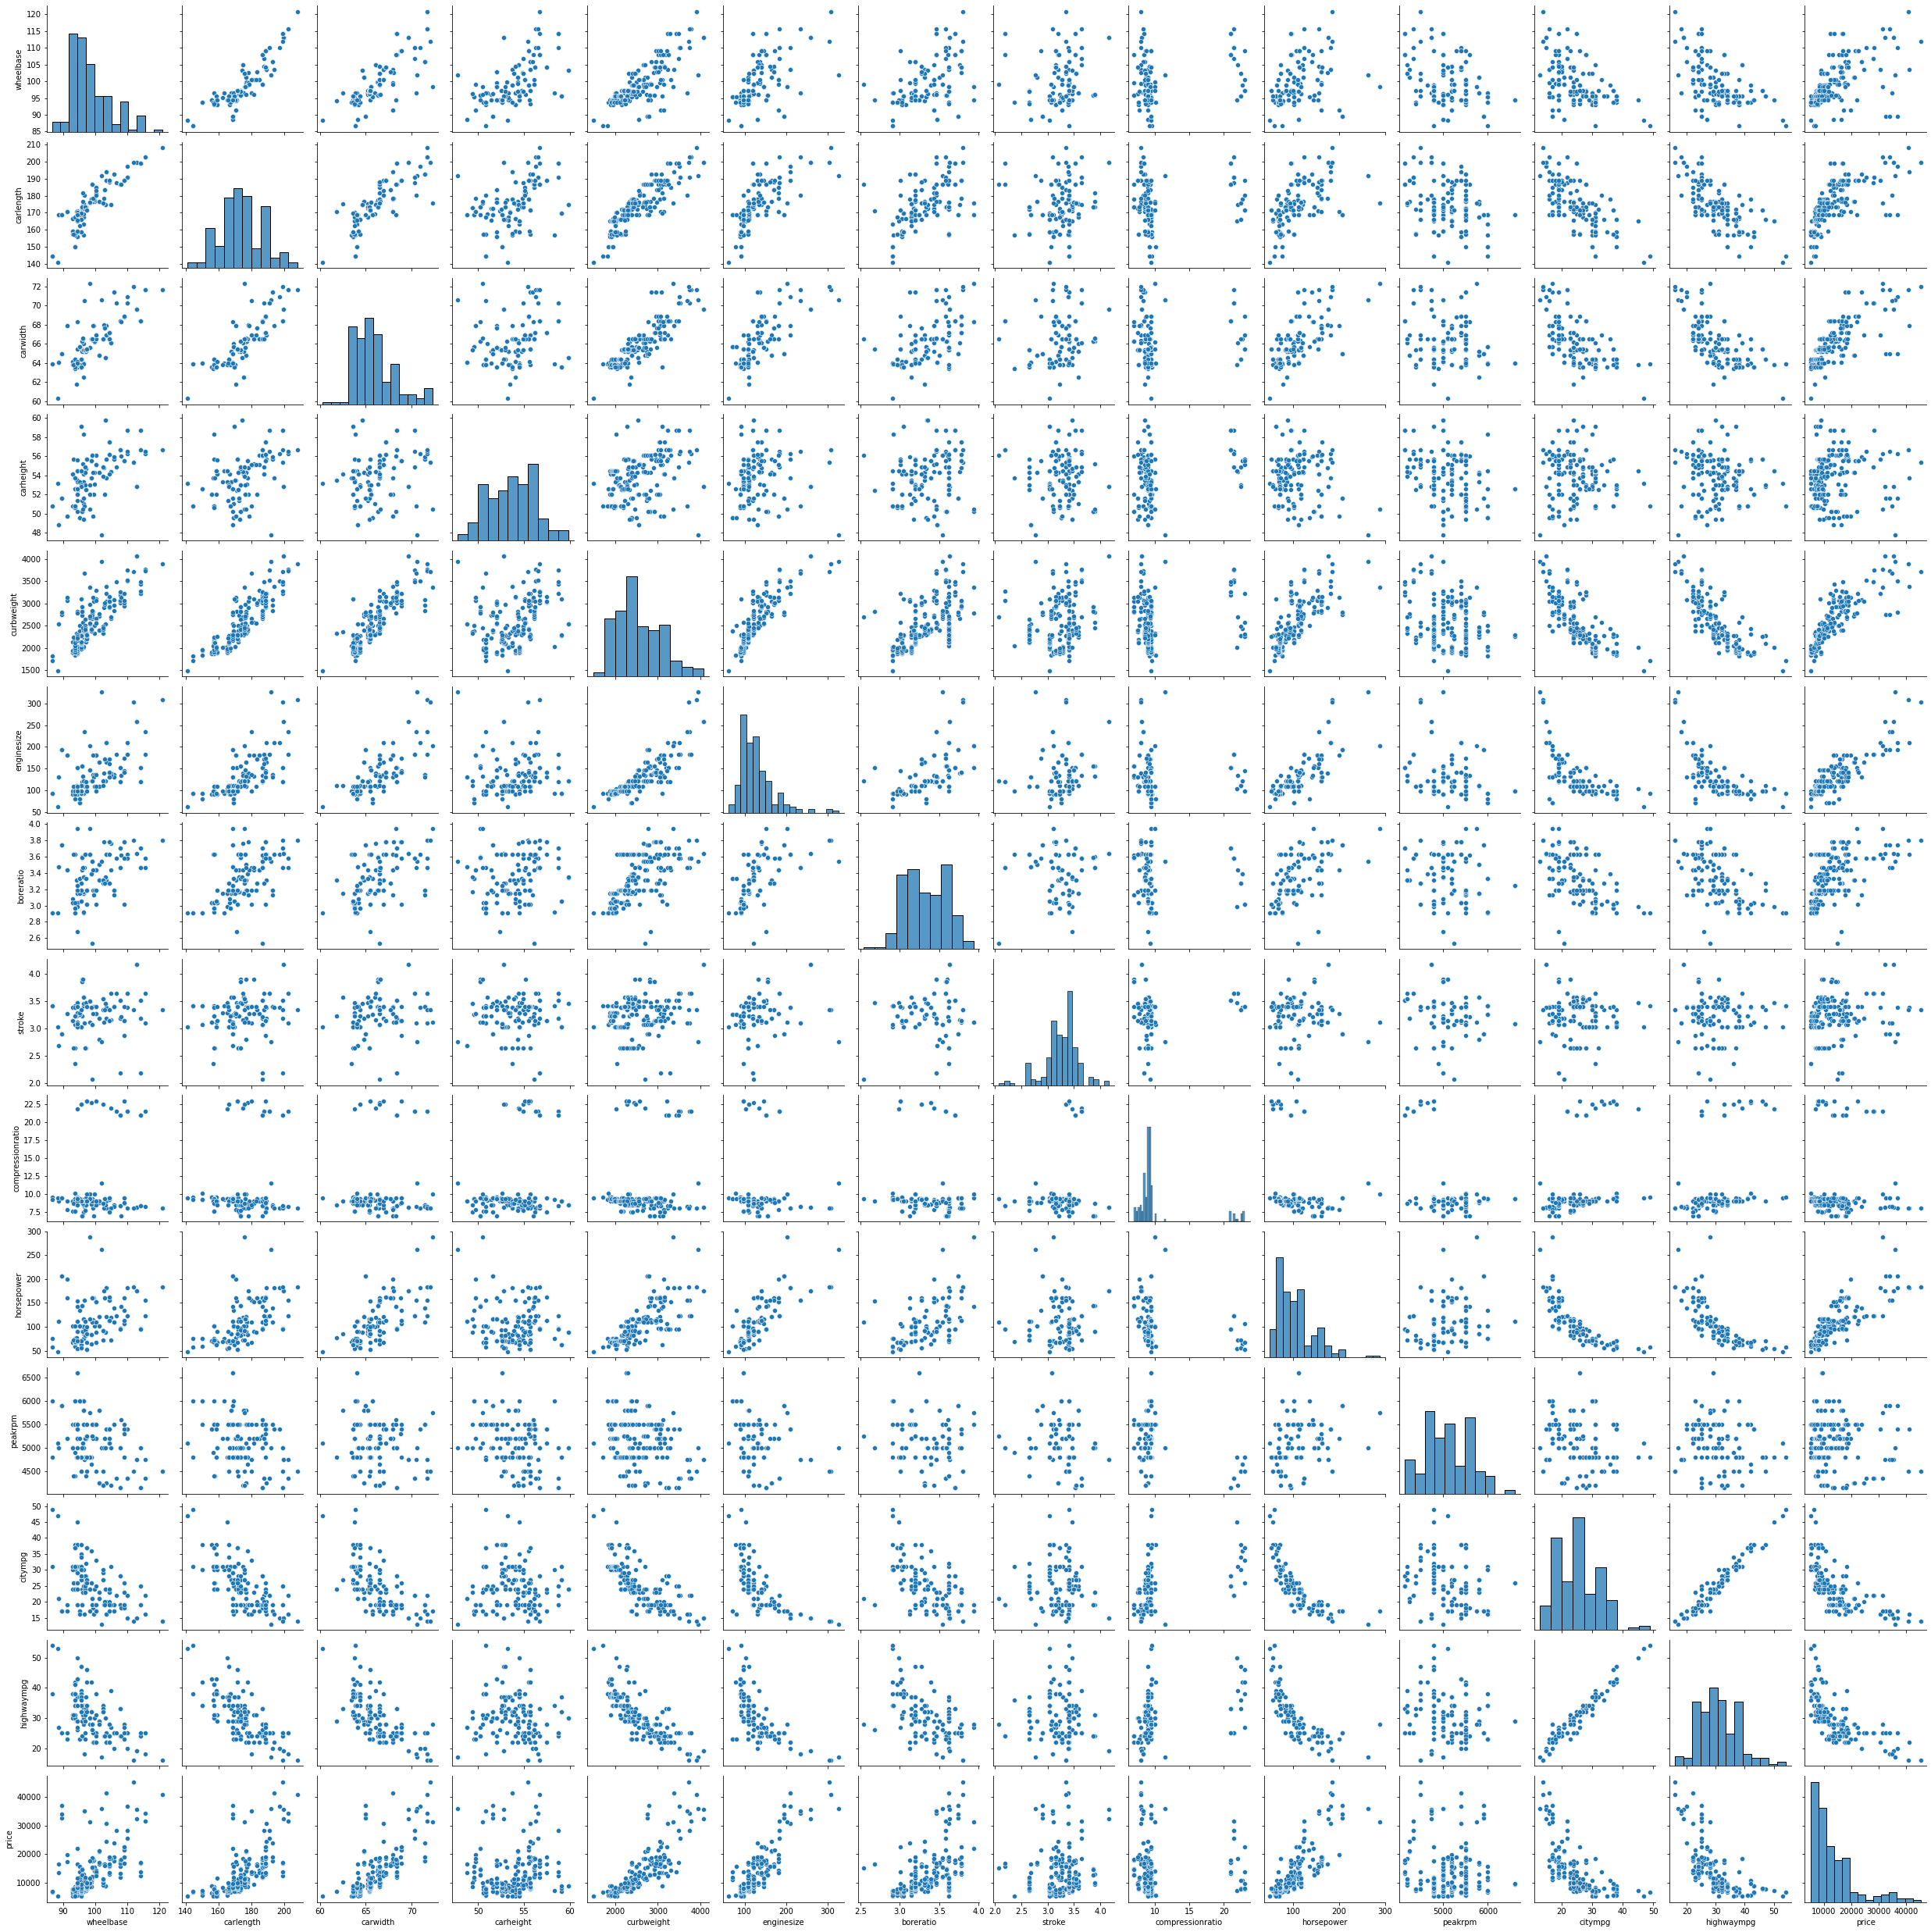

In [16]:
#import the required python libraries
import seaborn as sns

#display pairplot graphs
sns.pairplot(df)

C:\Users\aanak\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

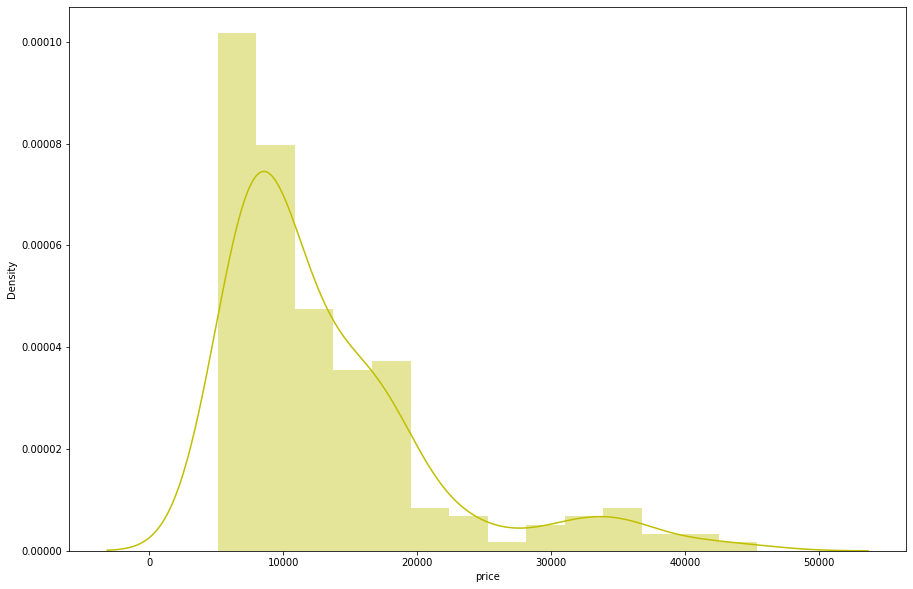

In [17]:
#import the required python libraries
import matplotlib.pyplot as plt

#set plot size
plt.figure(figsize=(15,10))

#display the distribution plot of price vc color
sns.distplot(df['price'],color="y")

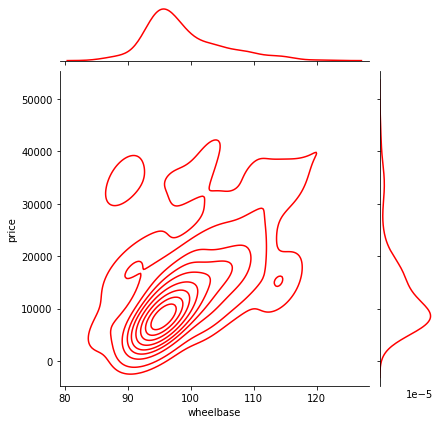

In [21]:
#heat plot for wheelbase vs price
sns.jointplot(x="wheelbase",y="price",data=df,kind='kde',color='red')

C:\Users\aanak\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enginelocation', ylabel='count'>

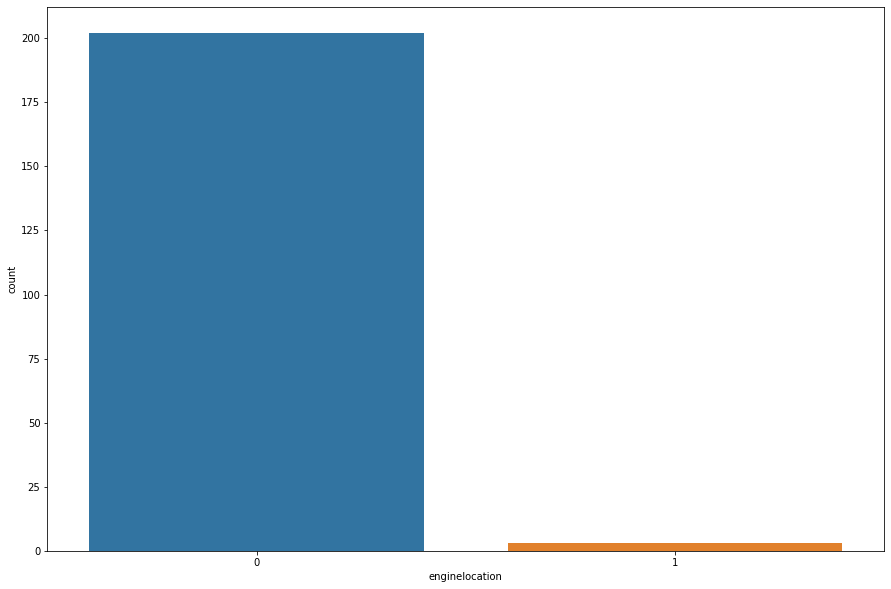

In [23]:
#visualising the number of cars with front and rear engines
plt.figure(figsize=(15,10))
sns.countplot(df['enginelocation'])

# Encoding

In [18]:
#import required python libraries
from sklearn.preprocessing import LabelEncoder

#Label encoding the data in categorical variables
lab=LabelEncoder()
df['fuelsystem']=lab.fit_transform(df['fuelsystem'])
df['cylindernumber']=lab.fit_transform(df['cylindernumber'])
df['enginetype']=lab.fit_transform(df['enginetype'])
df['enginelocation']=lab.fit_transform(df['enginelocation'])
df['drivewheel']=lab.fit_transform(df['drivewheel'])
df['carbody']=lab.fit_transform(df['carbody'])
df['doornumber']=lab.fit_transform(df['doornumber'])
df['aspiration']=lab.fit_transform(df['aspiration'])
df['fueltype']=lab.fit_transform(df['fueltype'])
df['CarName']=lab.fit_transform(df['CarName'])

In [19]:
#check data after encoding
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


# Handling outliers

C:\Users\aanak\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enginesize'>

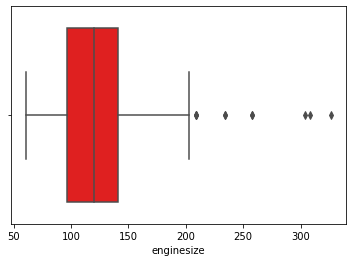

In [26]:
#creating boxplot for data in engine size
sns.boxplot(df['enginesize'],color='red')

rank() function compute numerical data ranks (1 through n) along axis. Equal values are assigned a rank that is the average of the ranks of those values.

In [28]:
df['enginesize']=df['enginesize'].rank()
df['enginesize']

0      132.5
1      132.5
2      165.5
3       84.5
4      143.0
       ...  
200    151.0
201    151.0
202    181.0
203    155.0
204    151.0
Name: enginesize, Length: 205, dtype: float64

C:\Users\aanak\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enginesize'>

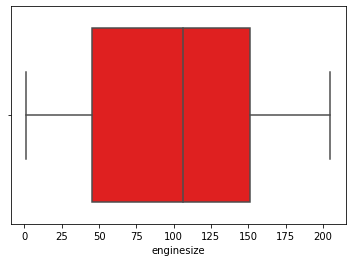

In [30]:
#after rank method
sns.boxplot(df['enginesize'],color='red')

As we can see the outliers observed in the first boxplot are removed as per the second boxplot

# Correlation Matrix

<AxesSubplot:>

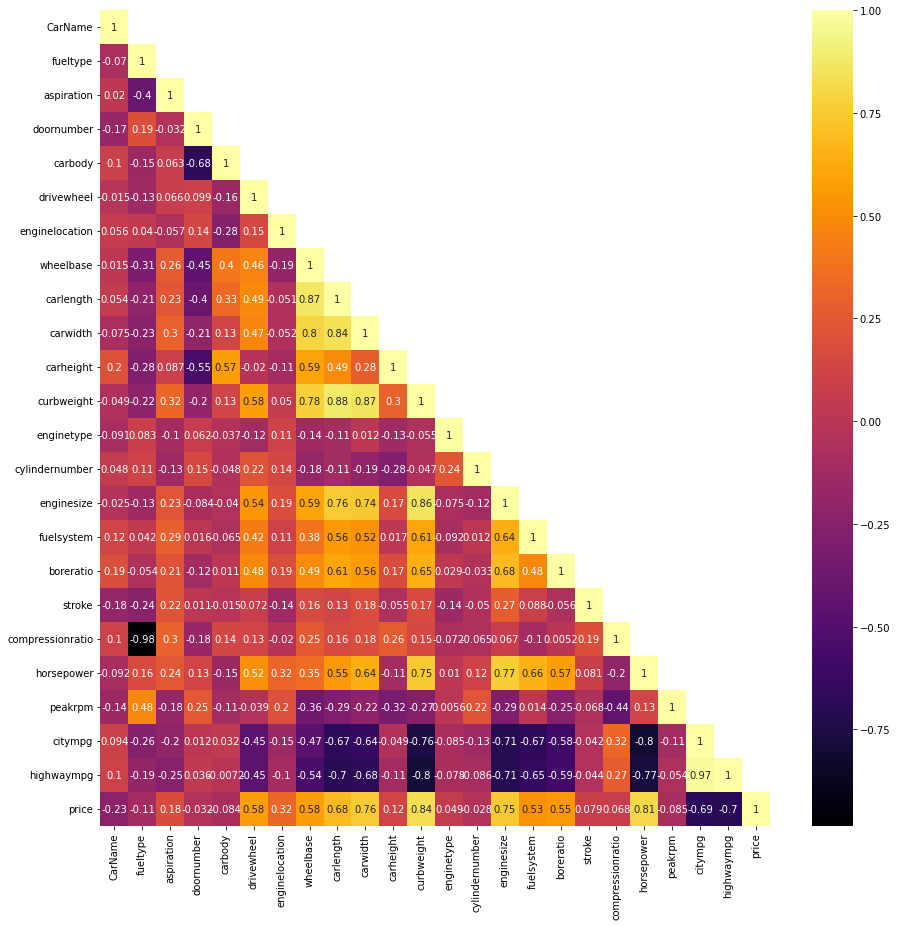

In [33]:
#plotting heat map for checking correlation between variables
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='inferno',mask=np.triu(df.corr(),k=1))

From the above heat map we can observe:
1. carwidth , carlength, curbweight ,enginesize ,horsepowerseems to have a poitive correlation with price.
2. carheight doesn't show any significant trend with price.
3. citympg , highwaympg - seem to have a significant negative correlation with price

In [38]:
#highwaympg and citympg are highly correlated so we will drop citympg as its correlation with car price is lesser
df.drop(['citympg'], axis = 1)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,...,2,132.5,5,3.47,2.68,9.0,111,5000,27,13495.0
1,3,3,1,0,1,0,2,0,88.6,168.8,...,2,132.5,5,3.47,2.68,9.0,111,5000,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,3,165.5,5,2.68,3.47,9.0,154,5000,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,...,2,84.5,5,3.19,3.40,10.0,102,5500,30,13950.0
4,2,4,1,0,0,3,0,0,99.4,176.6,...,1,143.0,5,3.19,3.40,8.0,115,5500,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,138,1,0,0,3,2,0,109.1,188.8,...,2,151.0,5,3.78,3.15,9.5,114,5400,28,16845.0
201,-1,137,1,1,0,3,2,0,109.1,188.8,...,2,151.0,5,3.78,3.15,8.7,160,5300,25,19045.0
202,-1,139,1,0,0,3,2,0,109.1,188.8,...,3,181.0,5,3.58,2.87,8.8,134,5500,23,21485.0
203,-1,141,0,1,0,3,2,0,109.1,188.8,...,3,155.0,3,3.01,3.40,23.0,106,4800,27,22470.0


# Feature selection

Features horsepower,enginesize,carwidth and curbwidth are chosen for their high correlation with car price and highwaympg is chosen for its high negative correlation with price.

In [40]:
finaldf = df.filter(['horsepower','enginesize','curbweight','carwidth','highwaympg','price'], axis=1)
finaldf.head()

,horsepower,enginesize,curbweight,carwidth,highwaympg,price
0,111,132.5,2548,64.1,27,13495.0
1,111,132.5,2548,64.1,27,16500.0
2,154,165.5,2823,65.5,26,16500.0
3,102,84.5,2337,66.2,30,13950.0
4,115,143.0,2824,66.4,22,17450.0


# Train test split

In [41]:
#import the required python libraries
from sklearn.model_selection import train_test_split

# We specify random seed so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(finaldf, train_size = 0.8, test_size = 0.2, random_state = 42)


# Re-scaling the Features

It is important to re-scale the variables so that they all have a comparable scale.

In [45]:
#import the required python libraries
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Applying scaler() to all the columns 
df_train = scaler.fit_transform(df_train)

df_train

array([[0.08474576, 0.67574257, 0.39207833, 0.40952381, 0.67647059,
        0.32833524],
       [0.18220339, 0.50990099, 0.55896751, 0.62857143, 0.23529412,
        0.25971898],
       [0.04237288, 0.13861386, 0.20516244, 0.17142857, 0.61764706,
        0.04468497],
       [0.0720339 , 0.21039604, 0.06764575, 0.19047619, 0.61764706,
        0.05910829],
       [0.1440678 , 0.4529703 , 0.20916778, 0.32380952, 0.5       ,
        0.09872896],
       [0.06779661, 0.0470297 , 0.0658656 , 0.19047619, 0.64705882,
        0.02758056],
       [0.08898305, 0.35148515, 0.13395639, 0.17142857, 0.44117647,
        0.04803634],
       [0.18220339, 0.80445545, 0.63773921, 0.62857143, 0.5       ,
        0.29248796],
       [0.3940678 , 0.83168317, 0.44147753, 0.42857143, 0.23529412,
        0.19477682],
       [0.07627119, 0.0470297 , 0.02447708, 0.17142857, 0.79411765,
        0.02921901],
       [0.46186441, 0.87128713, 0.51490877, 0.56190476, 0.23529412,
        0.28399782],
       [0.01271186, 0

# Building the model

In [54]:
# Dividing the training data set into X and Y
y_train = df_train.price
X_train = df_train

AttributeError: 'numpy.ndarray' object has no attribute 'price'